In [1]:
import pandas as pd
import numpy as np
#import os
train_data=pd.read_csv('train.csv')
#test_data=pd.read_csv('test.csv')


In [2]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#No LOan Status attribute
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train_data.shape

(614, 13)

In [7]:
test_data.shape

(367, 12)

In [8]:
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
train_data.isnull().sum().sort_values(ascending=True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [10]:
trains_data=train_data.dropna()

In [11]:
trains_data.isnull().sum().sort_values(ascending=True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
trains_data.shape

(480, 13)

In [13]:
tests_data=test_data.dropna()

In [14]:
tests_data.shape

(289, 12)

In [15]:
trains_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
trains_data['Loan_Status'].value_counts(normalize=True)



Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

<AxesSubplot:>

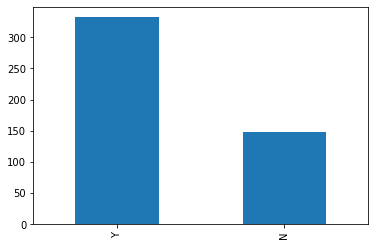

In [17]:
trains_data['Loan_Status'].value_counts().plot.bar()

In [18]:
trains_data['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [19]:
trains_data['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [20]:
trains_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
trains_data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [22]:
trains_data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [23]:
trains_data['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

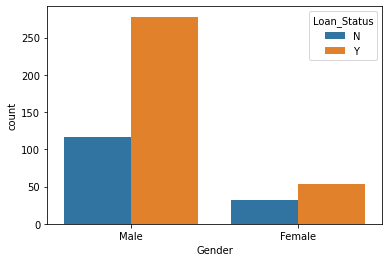

In [24]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.countplot(x='Gender', hue='Loan_Status', data=trains_data) # shows male has more loan status

<AxesSubplot:xlabel='Education', ylabel='count'>

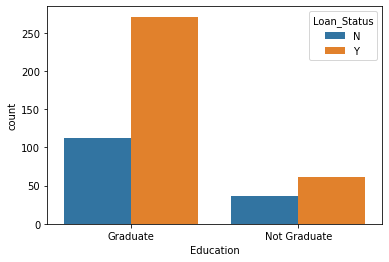

In [25]:
sns.countplot(x='Education', hue='Loan_Status', data=trains_data) #graduate has more loan status

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

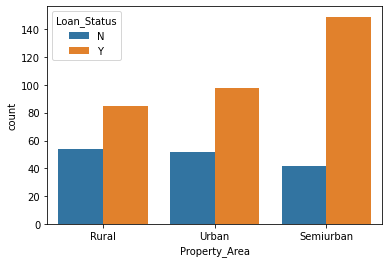

In [26]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=trains_data)#semiurban has more loan status

<AxesSubplot:xlabel='Dependents', ylabel='count'>

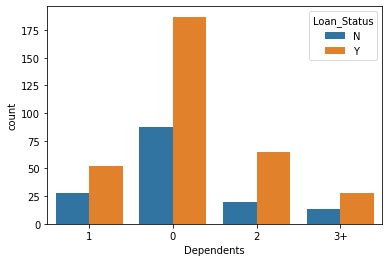

In [27]:
sns.countplot(x='Dependents', hue='Loan_Status', data=trains_data)

<AxesSubplot:>

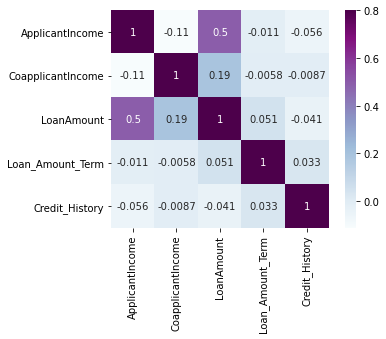

In [28]:
sns.heatmap(trains_data.corr(), vmax=.8, square= True, cmap='BuPu', annot= True) #correlation between applicant income and loan amount

<AxesSubplot:xlabel='Loan_Status'>

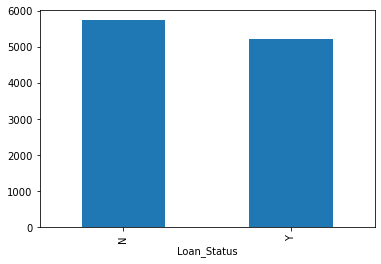

In [29]:
trains_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


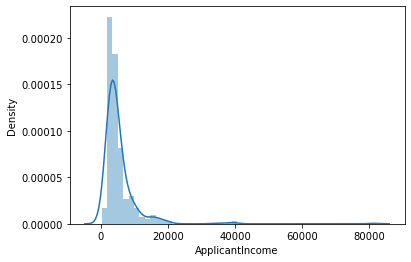

In [30]:
import matplotlib.pyplot as plt
sns.distplot(trains_data['ApplicantIncome'])
 ## applicant income are towards the left - not normally distributed
plt.show()

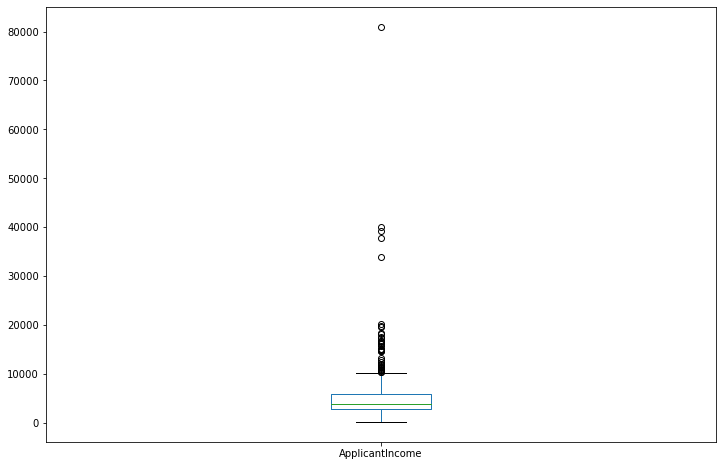

In [31]:
trains_data['ApplicantIncome'].plot.box(figsize=(12,8))
plt.show()# presence of a lot of outliers/extreme values

Text(0.5, 0.98, '')

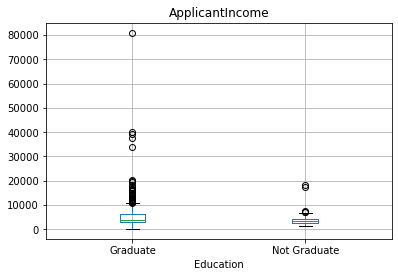

In [32]:
trains_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("") #higher number of graduates with very high incomes, which are appearing to be outliers.

<ipython-input-33-dc2ea61e69f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_data['LoanAmount_log']=np.log(trains_data['LoanAmount'])


<AxesSubplot:>

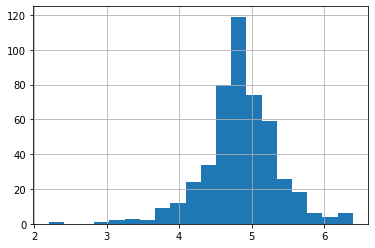

In [33]:
trains_data['LoanAmount_log']=np.log(trains_data['LoanAmount'])
trains_data['LoanAmount_log'].hist(bins=20) # distribution looks much closer to normal

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


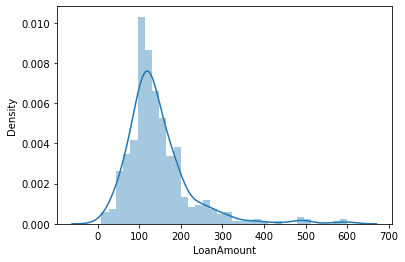

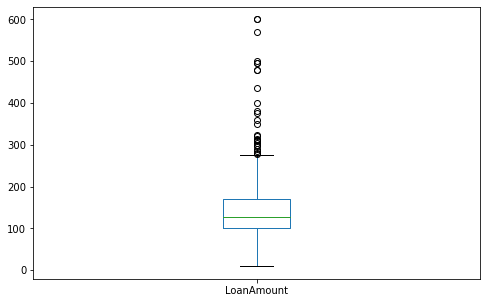

In [34]:

sns.distplot(trains_data['LoanAmount']) #  distribution is fairly normal
plt.show()
trains_data['LoanAmount'].plot.box(figsize=(8,5)) # lot of outliers in this variable
plt.show()

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


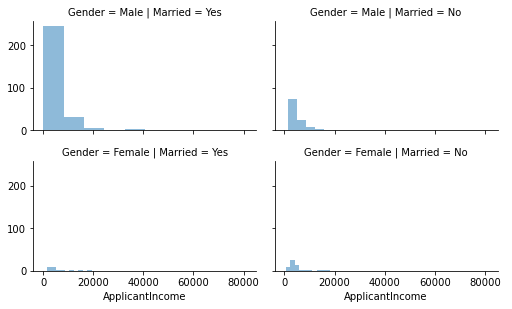

In [35]:
grid = sns.FacetGrid(trains_data, row='Gender', col='Married', size=2.2, aspect= 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend() #Males that are married have greater income that unmarried male. 

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


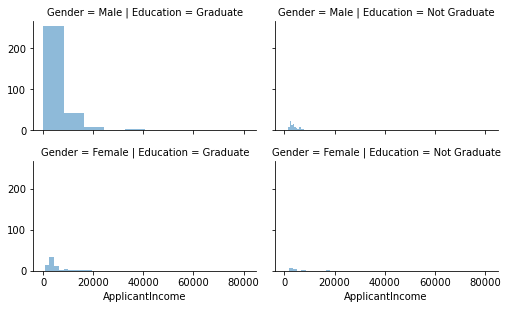

In [36]:
grid = sns.FacetGrid(trains_data, row='Gender', col='Education', size=2.2, aspect= 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()#A graduate who is a male has more income

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


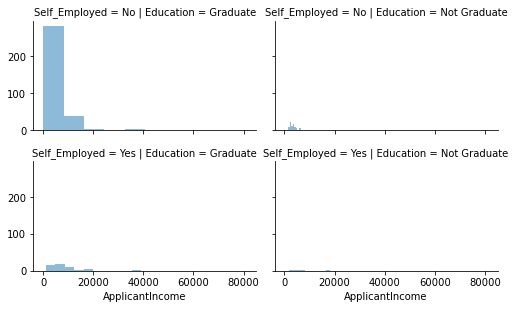

In [37]:

grid = sns.FacetGrid(trains_data, row='Self_Employed', col='Education', size=2.2, aspect= 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend() # A graduate but not self-employed has more income


In [38]:
from sklearn.preprocessing import LabelEncoder
var=['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var:
    trains_data[i] = le.fit_transform(trains_data[i])


<ipython-input-38-1a8439c6b28d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_data[i] = le.fit_transform(trains_data[i])


In [39]:
trains_data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
dtype: object

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=trains_data.drop('Loan_Status', axis=1)
y=trains_data.Loan_Status
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1, test_size=0.20)
Lg=LogisticRegression()
Lg.fit(x_train, y_train)
y_pred=Lg.predict(x_test)
y_pred

C:\Users\arindam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [41]:
df_pred=pd.DataFrame()
df_pred['Actual']=y_test
df_pred['Predicted']=y_pred
df_pred

,Actual,Predicted
378,0,1
365,0,1
47,1,1
487,0,0
552,1,1
...,...,...
526,1,1
537,1,1
547,1,1
72,1,1


In [42]:
from sklearn.metrics import accuracy_score
print('accuracy score of test data', accuracy_score(y_test, y_pred)*100)


accuracy score of test data 67.70833333333334


In [43]:
from sklearn.metrics import f1_score
print('the f1 valuation ', f1_score(y_test, y_pred))

the f1 valuation  0.786206896551724


In [44]:
from sklearn.metrics import classification_report
print('The classification report\n',
     classification_report(y_test, y_pred))

The classification report
               precision    recall  f1-score   support

           0       0.57      0.24      0.34        33
           1       0.70      0.90      0.79        63

    accuracy                           0.68        96
   macro avg       0.63      0.57      0.56        96
weighted avg       0.65      0.68      0.63        96



In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=2)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [46]:
print('The accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

The accuracy score 73.95833333333334
the f1 valuation  0.832214765100671


In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 9, 24],
       [ 1, 62]], dtype=int64)

[Text(0.5, 0.8333333333333334, 'X[10] <= 0.5\ngini = 0.42\nsamples = 384\nvalue = [115, 269]'),
 Text(0.25, 0.5, 'X[8] <= 547.5\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[2] <= 0.5\ngini = 0.306\nsamples = 324\nvalue = [61, 263]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.404\nsamples = 107\nvalue = [30, 77]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.245\nsamples = 217\nvalue = [31, 186]')]

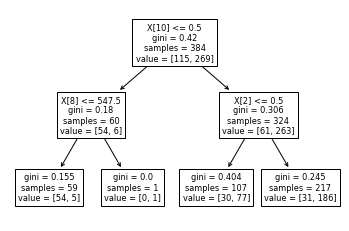

In [48]:
from sklearn import tree
tree.plot_tree(DTC)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [50]:
print('accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

accuracy score 68.75
the f1 valuation  0.7887323943661971


In [51]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train, y_train)
y_pred=xg.predict(x_test)
y_pred

[19:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\arindam\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0])

In [52]:
print('accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

accuracy score 68.75
the f1 valuation  0.782608695652174


<AxesSubplot:>

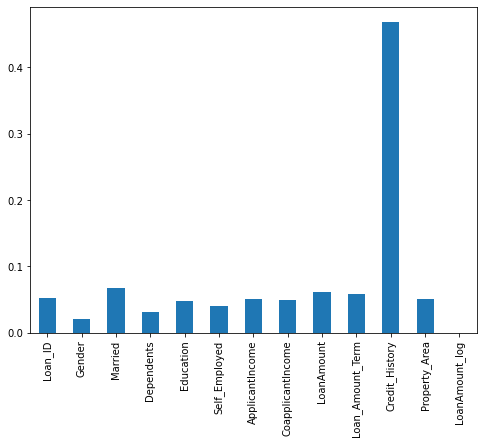

In [53]:
feature_pred = pd.Series(xg.feature_importances_, index=x.columns)
feature_pred.plot(kind='bar', figsize=(8,6)) #credit history is most important feature